<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#如何使用-EM-算法工具完成聚类？" data-toc-modified-id="如何使用-EM-算法工具完成聚类？-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>如何使用 EM 算法工具完成聚类？</a></span></li><li><span><a href="#何时使用聚类算法？使用聚类算法的任务目标是什么？" data-toc-modified-id="何时使用聚类算法？使用聚类算法的任务目标是什么？-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>何时使用聚类算法？使用聚类算法的任务目标是什么？</a></span></li><li><span><a href="#面对王者荣耀的英雄数据，EM-算法能分析出什么？" data-toc-modified-id="面对王者荣耀的英雄数据，EM-算法能分析出什么？-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>面对王者荣耀的英雄数据，EM 算法能分析出什么？</a></span></li><li><span><a href="#总结" data-toc-modified-id="总结-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>总结</a></span></li><li><span><a href="#练习" data-toc-modified-id="练习-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>练习</a></span></li></ul></div>

- 如何使用 EM 算法工具完成聚类？


- 何时使用聚类算法？使用聚类算法的任务目标是什么？


- 面对王者荣耀的英雄数据，EM 算法能分析出什么？

## 如何使用 EM 算法工具完成聚类？

课程主要讲解 GMM 高斯混合模型：

In [ ]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=1, covariance_type=‘full’, max_iter=100)

n_components：聚类个数，默认值为 1；

covariance_type：协方差类型。
    1. covariance_type=full，完全协方差，即元素都不为 0；
    1. covariance_type=tied，相同的完全协方差；
    1. covariance_type=diag，对角协方差，即除对角不为 0 以外，其余均为 0；
    1. covariance_type=spherical，球面协方差，即非对角为 0，对角完全相同，呈现球面的特性。

max_iter：最大迭代次数，默认为 100。

## 何时使用聚类算法？使用聚类算法的任务目标是什么？

## 面对王者荣耀的英雄数据，EM 算法能分析出什么？

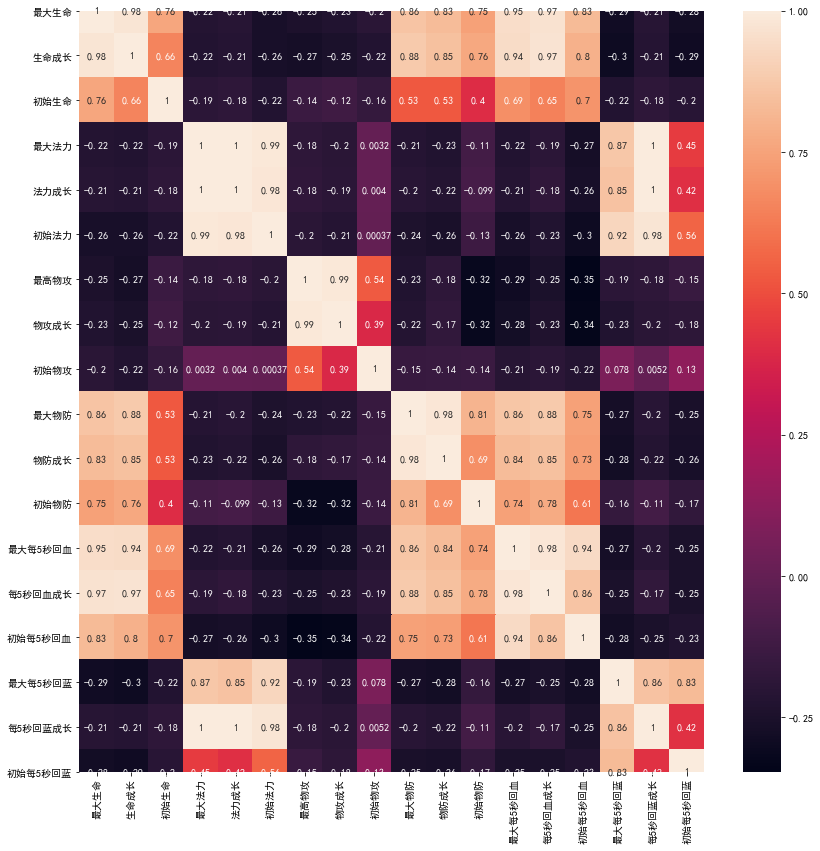

[12 22  5 25  9  9 18  5  8  1  7 22 25 28 27  7 26  8  2  0  4 16  0 16
 16 16  0 13 10  3 28 15 11 15  3 15 15 17 20 11 11 15 15 15 15 11 22 20
 22 15 19  6  2 14 14 12 29  6 24  9 29  2 23 12 21  6  6  6 13]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [4]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
 
data_ori = pd.read_csv('./datasets/heros.csv', encoding = 'gb18030')
features = [u'最大生命',u'生命成长',u'初始生命',u'最大法力', u'法力成长',u'初始法力',u'最高物攻',u'物攻成长',u'初始物攻',u'最大物防',u'物防成长',u'初始物防', u'最大每5秒回血', u'每5秒回血成长', u'初始每5秒回血', u'最大每5秒回蓝', u'每5秒回蓝成长', u'初始每5秒回蓝', u'最大攻速', u'攻击范围']
data = data_ori[features]
 
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False 

corr = data[features].corr()
plt.figure(figsize=(14,14))

sns.heatmap(corr, annot=True)
plt.show()
 

features_remain = [u'最大生命', u'初始生命', u'最大法力', u'最高物攻', u'初始物攻', u'最大物防', u'初始物防', u'最大每5秒回血', u'最大每5秒回蓝', u'初始每5秒回蓝', u'最大攻速', u'攻击范围']
data = data_ori[features_remain]
data[u'最大攻速'] = data[u'最大攻速'].apply(lambda x: float(x.strip('%'))/100)
data[u'攻击范围']=data[u'攻击范围'].map({'远程':1,'近战':0})

ss = StandardScaler()
data = ss.fit_transform(data)

gmm = GaussianMixture(n_components=30, covariance_type='full')
gmm.fit(data)

prediction = gmm.predict(data)
print(prediction)

data_ori.insert(0, '分组', prediction)
data_ori.to_csv('./datasets/hero_out.csv', index=False, sep=',')

评估聚类结果：

In [ ]:
from sklearn.metrics import calinski_harabaz_score
print(calinski_harabaz_score(data, prediction))

指标分数越高，代表聚类效果越好，也就是相同类中的差异性小，不同类之间的差异性大。

另，聚类算法也可作为其他数据挖掘算法的预处理阶段，以便于对数据进行降维。

## 总结

<img src="https://static001.geekbang.org/resource/image/43/d7/43b35b8f49ac83799ea1ca88383609d7.png" style="width:700px">

## 练习

1. 尝试用全部的特征值进行聚类。
1. 在聚类数为 3 个、30 个的情况下，使用 GMM 高斯混合模型对数据集进行聚类，并得出 Calinski_Harabaz 分数。